**Linear approximations: LSTD**

In this exercise, we are going to use the following Random Walk to study how linear approximations work for RL. In this part, concretely, we will study how to predict without knowing the model, i.e., in a model-free setting, using the LSTD (Least-Squares Time Difference) algorithm. The Random Walk is the following:

![alt text](rw_2.png "Title")

Let us start with the imports. We use numpy and matplotlib.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next thing we do is to seed the random number generator.This is done to ensure that the results are reproducible.At this point, this is not strictly necessary, but it is good practice to do so (and when working with Deep Reinforcement Learning, it is absolutely necessary).

In [17]:
rng = np.random.default_rng(1234)

The next thing to do is to define the MDP using the data given in the image as:

In [18]:
n_states = 4
n_actions = 2
gamma = 0.9  # Discount factor

R = np.array([.9, 0.1, .9, 0.1, 0.1, .9, 0.1, .9]).reshape([n_states * n_actions, 1])

P = np.array([[.1, .9, 0, 0],
              [.9, .1, 0, 0],
              [.1, 0, .9, 0],
              [.9, 0, .1, 0],
              [0, .1, 0, .9],
              [0, .9, 0, .1],
              [0, 0, .1, .9],
              [0, 0, .9, .1]])

pi_rp = np.array([[.5, .5, 0, 0, 0, 0, 0, 0],
                  [0, 0, .5, .5, 0, 0, 0, 0],
                  [0, 0, 0, 0, .5, .5, 0, 0],
                  [0, 0, 0, 0, 0, 0, .5, .5]])  # Random policy

pi_opt = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])  # Optimal policy

Next, we are going to need the feature matrix, that you have computed in a previous exercise. Copy and paste here the code you used to compute it.

In [19]:
n_features = 2
phi = np.zeros((n_states * n_actions, n_features * n_actions))

# To be filled by the student

with np.printoptions(precision=4, suppress=True):
    print("The feature matrix is:")
    print(phi)

The feature matrix is:
[[0.0967 0.088  0.     0.    ]
 [0.     0.     0.0967 0.088 ]
 [0.0997 0.0967 0.     0.    ]
 [0.     0.     0.0997 0.0967]
 [0.0967 0.0997 0.     0.    ]
 [0.     0.     0.0967 0.0997]
 [0.088  0.0967 0.     0.    ]
 [0.     0.     0.088  0.0967]]


We are going to compare the results with a model-based approach (from the previous exercise) and the linear Bellman equations (exact result). Complete the following code with the codes you have written in the previous exercises.

In [20]:
# Obtain the visiting probability for the random policy
P_rp = pi_rp @ P
w, v = np.linalg.eig(P_rp.T)
eig_unit = np.argmin(np.abs(w - 1))  # Find the unit eigenvector
d_v_rp = v[:, eig_unit] / np.sum(v[:, eig_unit])
assert np.all(d_v_rp >= 0)
d_q_rp = np.zeros([n_states * n_actions])
d_q_rp[::2] = d_v_rp
d_q_rp[1::2] = d_v_rp
d_q_rp = d_q_rp * .5
D_q_rp = np.diag(d_q_rp)  # Diagonal matrix with the visiting probability of the random policy

# Obtain the visiting probability for the optimal policy
P_rp = pi_opt @ P
w, v = np.linalg.eig(P_rp.T)
eig_unit = np.argmin(np.abs(w - 1))  # Find the unit eigenvector
d_v_op = v[:, eig_unit] / np.sum(v[:, eig_unit])
assert np.all(d_v_op >= 0)
d_q_op = np.zeros([n_states * n_actions])
d_q_op[0] = d_v_op[0]
d_q_op[2] = d_v_op[1]
d_q_op[5] = d_v_op[2]
d_q_op[7] = d_v_op[3]
D_q_op = np.diag(d_q_op)  # Diagonal matrix with the visiting probability of the optimal policy

# To be filled by the student: you must get q_rp_exact, q_rp_approx, q_op_exact, q_op_approx as numpy arrays containing the Q-function for each policy and method

with np.printoptions(precision=4, suppress=True):
    print("The exact Q-function for the random policy is:")
    print(q_rp_exact.flatten())
    print("The approximate Q-function for the random policy is:")
    print(q_rp_approx.flatten())
    print("The exact Q-function for the optimal policy is:")
    print(q_op_exact.flatten())
    print("The approximate Q-function for the optimal policy is:")
    print(q_op_approx.flatten())

The exact Q-function for the random policy is:
[5.4 4.6 5.4 4.6 4.6 5.4 4.6 5.4]
The approximate Q-function for the random policy is:
[5.4141 4.1875 5.323  4.8879 4.8879 5.323  4.1875 5.4141]
The exact Q-function for the optimal policy is:
[9.  8.2 9.  8.2 8.2 9.  8.2 9. ]
The approximate Q-function for the optimal policy is:
[9.     7.3884 9.     8.4283 8.4283 9.     7.3884 9.    ]


Now, complete the following code, that implements LSTD algorithm, as seen in the slides. The results should be similar to the ones shown.

In [21]:
niter = 10000  # Number of iterations for LSTD

def LSTD(policy):

    # To be filled by the student

    return q_est_approx  # Q is a numpy array containing the estimated Q-function

with np.printoptions(precision=4, suppress=True):
    print("The estimated Q-function for the random policy is:")
    print(LSTD(pi_rp).flatten())
    print("The estimated Q-function for the optimal policy is:")
    print(LSTD(pi_opt).flatten())

The estimated Q-function for the random policy is:
[5.3434 4.1327 5.2483 4.8265 4.8137 5.2585 4.1181 5.3505]
The estimated Q-function for the optimal policy is:
[9.044  7.4315 9.033  8.4666 8.4474 9.0307 7.3933 9.0217]


Finally, we are going to plot the Q-function for each policy and method, so that you can compare them.

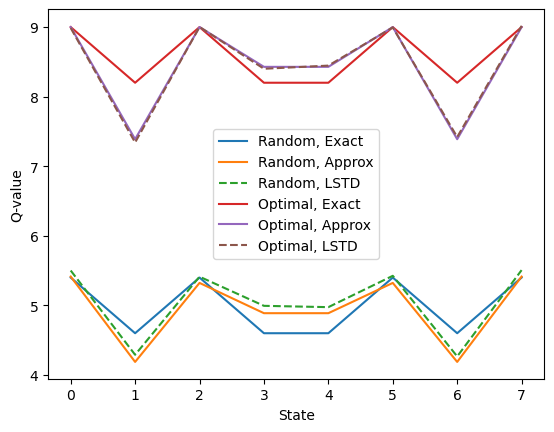

In [23]:
plt.plot(np.arange(n_states * n_actions), q_rp_exact.flatten(), label="Random, Exact")
plt.plot(np.arange(n_states * n_actions), q_rp_approx.flatten(), label="Random, Approx")
plt.plot(np.arange(n_states * n_actions), LSTD(pi_rp).flatten(), linestyle='dashed', label="Random, LSTD")
plt.plot(np.arange(n_states * n_actions), q_op_exact.flatten(), label="Optimal, Exact")
plt.plot(np.arange(n_states * n_actions), q_op_approx.flatten(), label="Optimal, Approx")
plt.plot(np.arange(n_states * n_actions), LSTD(pi_opt).flatten(), linestyle='dashed', label="Optimal, LSTD")
plt.xlabel('State')
plt.ylabel('Q-value')
plt.legend(loc='best')
plt.show()